In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from langchain_groq import ChatGroq

In [3]:
llm = ChatGroq(model ='openai/gpt-oss-20b',api_key=os.getenv("GROQ_API_KEY"))

In [5]:
from langchain_tavily import TavilySearch

In [6]:
tavily_tool = TavilySearch(
    api_key=os.getenv("TAVILY_API_KEY"),
    max_results=5
)

tools = [tavily_tool]


In [7]:
tools = [tavily_tool]

In [8]:
llm_with_tools = llm.bind_tools(tools)

In [9]:
from typing import Annotated, List
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langchain_core.messages import BaseMessage

In [10]:
class State(TypedDict):
    messages: Annotated[List[BaseMessage], add_messages]


In [38]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition


# Interface Node: classification
def interface_node(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

    return {"messages": state["messages"] + [AIMessage(content=classification)]}


# Answer Node: tries answering using tools-enabled LLM
def answer_node(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder = StateGraph(State)

graph_builder.add_node("interface", interface_node)
graph_builder.add_node("answer", answer_node)
graph_builder.add_node("tool_node", ToolNode(tools))

graph_builder.add_edge(START, "interface")
graph_builder.add_edge("interface", "answer")

graph_builder.add_conditional_edges(
    "answer",
    tools_condition,
    {
        "tools": "tool_node",
        "__end__": END
    }
)

graph_builder.add_edge("tool_node", "answer")

graph = graph_builder.compile()




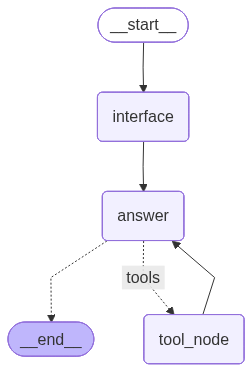

In [39]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [40]:
response = graph.invoke({"messages": "give me recent al news made yesterday"})
for m in response["messages"]:
    m.pretty_print()



================================ Human Message =================================

give me recent al news made yesterday
================================== Ai Message ==================================

I’m sorry, but I don’t have access to real‑time browsing or the ability to pull in yesterday’s exact headlines.  However, you can quickly find the most recent AI news by checking a few trusted sources that publish daily updates:

| Source | How to find yesterday’s AI stories |
|--------|-----------------------------------|
| **TechCrunch** | Go to the “Artificial Intelligence” section and filter by “Past 24 hours.” |
| **MIT Technology Review – AI** | Use the “News” tab, then select the date filter (e.g., “Nov 28, 2025”). |
| **Ars Technica – AI** | The “AI” tag will show the latest posts; the sidebar lets you jump to a specific day. |
| **AI‑focused newsletters** (e.g., “Import AI,” “The Batch” by Andrew Ng) | Most newsletters are emailed daily; check the archive for the November 28 iss

In [30]:
config = {"configurable" : {"thread_id": "1"}}

In [31]:
response = graph.invoke({"messages": "my name is lemon"}, config=config)

In [32]:
response["messages"][-1].content

'Nice to meet you, Lemon! How can I assist you today?'

In [33]:
response = graph.invoke({"messages": "what is my name"}, config=config)

In [34]:
response["messages"][-1].content

'I’m not sure—what’s your name?'